# Machine Learning Fall 99 <img src = 'https://ece.ut.ac.ir/cict-theme/images/footer-logo.png' alt="Tehran-University-Logo" width="150" height="150" align="right">
## Homework 5
### By Omid Vaheb

## Question 7:
First of all we import required libraries.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras import layers
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns;

ModuleNotFoundError: No module named 'tensorflow'

Now we import the MNIST dataset.

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Now we define number of epochs and batch size which are not the parameters we focus in this question.

In [ ]:
batch_size = 32
epochs = 10
activation = 'relu'

The first parameter we manipulate is Hidden Layer Size. The size of the hidden layer changes the number of neurons in the hidden layer in which increasing it will help us learn more complex patterns, but it decreases the convergence rate. As you can see the higher number had lower training loss nut its convergance took longer time.

Hidden Layer Size: 50
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 59.4059 - val_loss: 28.1290
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 28.2068 - val_loss: 28.1290
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 28.0887 - val_loss: 28.1290
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 28.2259 - val_loss: 28.1290
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 28.0935 - val_loss: 28.1290
Hidden Layer Size: 100
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 55.3799 - val_loss: 28.1290
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 28.1715 - val_loss: 28.1290
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 28.1044 - val_loss: 28.1290
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 28.3179 - val_loss: 28.1290
Epoch 5/5
1875/1875 [=======

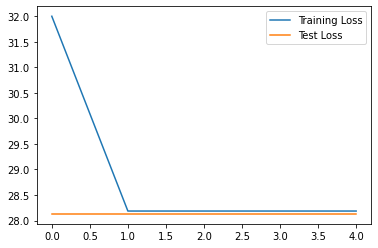

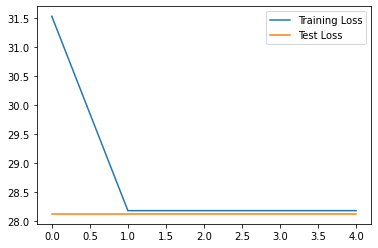

In [ ]:
for hidden_layer_size in [50, 100]:
    print("Hidden Layer Size : " + str(hidden_layer_size))
    inputs = keras.Input(shape = (28, 28))
    x = keras.layers.Flatten()(inputs)
    x = keras.layers.Dense(hidden_layer_size, activation = activation)(x)
    outputs = layers.Dense(10, activation = activation)(x)
    model = keras.Model(inputs = inputs, outputs = outputs)
    model.compile(optimizer = keras.optimizers.SGD(), loss = keras.losses.MeanSquaredError())
    history = model.fit(X_train, y_train, batch_size = batch_size, epochss = epochs, validation_data = (X_test, y_test))
    plt.figure()
    plt.plot(range(len(history.history["loss"])), history.history["loss"])
    plt.plot(range(len(history.history["val_loss"])), history.history["val_loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    Plt.title("Hidden Layer Size = " + str(hidden_layer_size))
    plt.legend(("Train Loss", "Test Loss"))

In [ ]:
y_pred=model.predict_classes(test_images)
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

The second parameter to manipulate is Activation Function. an activation function is a function that is added into an artificial neural network in order to help the network learn complex patterns in the data. When comparing with a neuron-based model that is in our brains, the activation function is at the end deciding what is to be fired to the next neuron. We consider 2 activation functions here called relu and sigmoid. The derivative of ReLu is 1 for positive inputs and 0 for negative inputs, but the sigmoid function has nonzero derivative for all the inputs. Also, the output of sigmoid function is bounder, but the range of ReLU is (0, infinity).

Activation Function: relu
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 64.6386 - val_loss: 28.1290
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 28.2939 - val_loss: 28.1290
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 28.1084 - val_loss: 28.1290
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 28.1157 - val_loss: 28.1290
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 28.2687 - val_loss: 28.1290
Activation Function: sigmoid
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 20.5224 - val_loss: 20.2599
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 20.4217 - val_loss: 20.2510
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 20.2752 - val_loss: 20.2481
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 20.2306 - val_loss: 20.2466
Epoch 5/5
1875/187

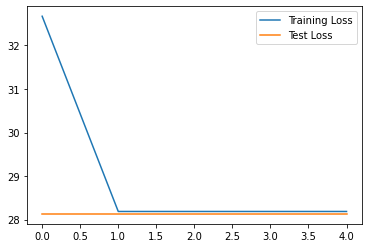

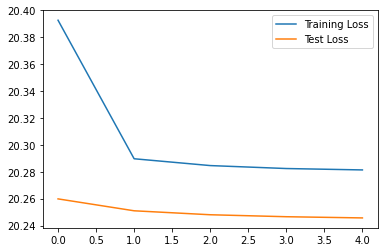

In [ ]:
hidden_layer_size = 50
for activation in ['relu', 'sigmoid']:
    print("Activation Function: " + activation)
    inputs = keras.Input(shape = (28, 28))
    x = keras.layers.Flatten()(inputs)
    x = keras.layers.Dense(hidden_layer_size, activation = activation)(x)
    outputs = layers.Dense(10, activation = activation)(x)
    model = keras.Model(inputs = inputs, outputs=outputs)
    model.compile(optimizer = keras.optimizers.SGD(), loss = keras.losses.MeanSquaredError())
    history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_test, y_test))
    plt.figure()
    plt.plot(range(len(history.history["loss"])), history.history["loss"])
    plt.plot(range(len(history.history["val_loss"])), history.history["val_loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    Plt.title("Activation Function = " + activation)
    plt.legend(("Training Loss", "Test Loss"))

The next parameter is Optimizer. Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses. How you should change your weights or learning rates of your neural network to reduce the losses is defined by the optimizers you use. Here we compare 2 kind of optimizers called SGD and adam. SGD is a variant of gradient descnet, but the updates are performed after a batch of data is analyzed. Adam Optimizer, tries to combine two versions of batch graident descnet, i.e. batch gradient descent with momentum and batch gradient descnet with RMSprop, and hence usually converges much faster than SGD.

Optimizer: 
<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 49.1685 - val_loss: 28.1290
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 28.1799 - val_loss: 28.1290
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 28.2698 - val_loss: 28.1290
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 28.1753 - val_loss: 28.1290
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 28.1225 - val_loss: 28.1290
Optimizer: 
<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 61.7511 - val_loss: 28.1349
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 28.2583 - val_loss: 28.1314
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 28.1125 - val_loss: 28.1290
Epoch 4/5
1875/1875 [======

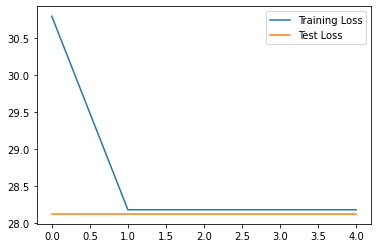

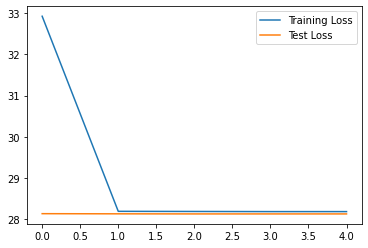

In [ ]:
activation = 'relu'
for optimizer in [keras.optimizers.SGD, keras.optimizers.Adam]:
    print("Optimizer: ")
    print(optimizer)
    inputs = keras.Input(shape = (28, 28))
    x = keras.layers.Flatten()(inputs)
    x = keras.layers.Dense(hidden_layer_size, activation = activation)(x)
    outputs = layers.Dense(10, activation = activation)(x)
    model = keras.Model(inputs = inputs, outputs = outputs)
    model.compile(optimizer = optimizer(), loss = keras.losses.MeanSquaredError())
    history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_test, y_test))
    plt.figure()
    plt.plot(range(len(history.history["loss"])), history.history["loss"])
    plt.plot(range(len(history.history["val_loss"])), history.history["val_loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    Plt.title("Optimizer = " + optimizer)
    plt.legend(("Training Loss", "Test Loss"))

Now we check Maximum Number of Iterations parameter or its other name which is number of epochs. The number of iterations shows how much has the parameters of the model approach their optimum value, and by increasing this number, usually the loss function of the training set will shrink. But a large number of iterations may lead to overfitting.

Maximum Iteration: 20
Epoch 1/5
3000/3000 [==============================] - 4s 1ms/step - loss: 40.2485 - val_loss: 28.1290
Epoch 2/5
3000/3000 [==============================] - 4s 1ms/step - loss: 28.0134 - val_loss: 28.1290
Epoch 3/5
3000/3000 [==============================] - 4s 1ms/step - loss: 28.3632 - val_loss: 28.1290
Epoch 4/5
3000/3000 [==============================] - 4s 1ms/step - loss: 28.3390 - val_loss: 28.1290
Epoch 5/5
3000/3000 [==============================] - 4s 1ms/step - loss: 28.3055 - val_loss: 28.1290
Maximum Iteration: 30
Epoch 1/5
2000/2000 [==============================] - 3s 1ms/step - loss: 59.7511 - val_loss: 28.1290
Epoch 2/5
2000/2000 [==============================] - 3s 1ms/step - loss: 28.1802 - val_loss: 28.1290
Epoch 3/5
2000/2000 [==============================] - 3s 1ms/step - loss: 28.2326 - val_loss: 28.1290
Epoch 4/5
2000/2000 [==============================] - 3s 1ms/step - loss: 28.2402 - val_loss: 28.1290
Epoch 5/5
2000/2000 [========

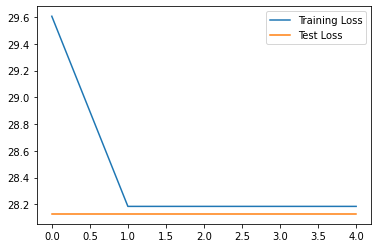

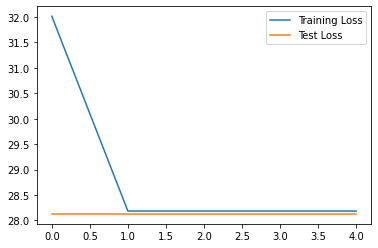

In [ ]:
optimizer = keras.optimizers.SGD
for max_iteration in [20, 30]:
    print("Maximum Iteration: " + str(max_iteration))
    inputs = keras.Input(shape = (28, 28))
    x = keras.layers.Flatten()(inputs)
    x = keras.layers.Dense(hidden_layer_size, activation = activation)(x)
    outputs = layers.Dense(10, activation = activation)(x)
    model = keras.Model(inputs = inputs, outputs = outputs)
    model.compile(optimizer = optimizer, loss = keras.losses.MeanSquaredError())
    history = model.fit(X_train, y_train, batch_size = max_iteration, epochs = epochs, validation_data = (X_test, y_test))
    plt.figure()
    plt.plot(range(len(history.history["loss"])), history.history["loss"])
    plt.plot(range(len(history.history["val_loss"])), history.history["val_loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    Plt.title("Maximum Iteration = " + str(max_iteration))
    plt.legend(("Training Loss", "Test Loss"))

The last parameter to Investigate will be Early Stopping. In case early stopping is applied to the problem, the model will try to avoid overfitting while the number of iterations has not reached the maximum number of iterations.

Early Stopping: True
Epoch 1/20
2000/2000 [==============================] - 3s 2ms/step - loss: 53.3946 - val_loss: 28.1290
Epoch 2/20
2000/2000 [==============================] - 3s 1ms/step - loss: 28.0467 - val_loss: 28.1290
Epoch 3/20
2000/2000 [==============================] - 3s 1ms/step - loss: 28.1722 - val_loss: 28.1290
Epoch 4/20
2000/2000 [==============================] - 3s 1ms/step - loss: 28.2154 - val_loss: 28.1290
Epoch 5/20
2000/2000 [==============================] - 3s 1ms/step - loss: 28.0873 - val_loss: 28.1290
Early Stopping: False
Epoch 1/20
2000/2000 [==============================] - 3s 1ms/step - loss: 51.9802 - val_loss: 28.1290
Epoch 2/20
2000/2000 [==============================] - 3s 1ms/step - loss: 28.0366 - val_loss: 28.1290
Epoch 3/20
2000/2000 [==============================] - 3s 1ms/step - loss: 28.1711 - val_loss: 28.1290
Epoch 4/20
2000/2000 [==============================] - 3s 1ms/step - loss: 28.1090 - val_loss: 28.1290
Epoch 5/20
2000/2000 

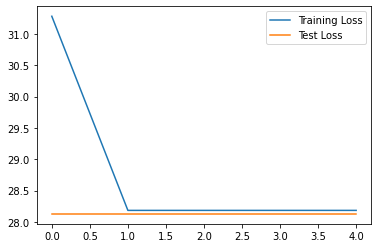

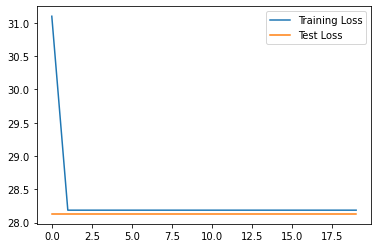

In [ ]:
epochs = 10
for early_stopping in [True, False]:
    callback = [tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)] if early_stopping else []
    print("Early Stopping: " + str(early_stopping))
    inputs = keras.Input(shape = (28, 28))
    x = keras.layers.Flatten()(inputs)
    x = keras.layers.Dense(hidden_layer_size, activation = activation)(x)
    outputs = layers.Dense(10, activation = activation)(x)
    model = keras.Model(inputs = inputs, outputs = outputs)
    model.compile(optimizer = keras.optimizers.SGD(), loss = keras.losses.MeanSquaredError())
    history = model.fit(X_train, y_train, batch_size = max_iteration, epochs = epochs, validation_data = (X_test, y_test),
                      callbacks = callback)
    plt.figure()
    plt.plot(range(len(history.history["loss"])), history.history["loss"])
    plt.plot(range(len(history.history["val_loss"])), history.history["val_loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    Plt.title("Early Stopping = " + str(early_stopping))
    plt.legend(("Training Loss", "Test Loss"))